In [142]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
import numpy as np
import cv2
from cellpose import models, plot
model = models.Cellpose(gpu=True, model_type="cyto3")
%matplotlib inline

In [143]:
patterns_reader = ND2Reader('/mnt/e/20220525_patterns_end.nd2')
cells_reader = ND2Reader('/mnt/e/20220525_MBAMB231.nd2')

In [144]:
print("Patterns image shape:")
for key, value in patterns_reader.sizes.items():
    print(f"\t{key}: {value}")
print("Cells image shape:")
for key, value in cells_reader.sizes.items():
    print(f"\t{key}: {value}")

Patterns image shape:
	x: 2044
	y: 2048
	t: 1
	v: 154
Cells image shape:
	x: 2044
	y: 2048
	c: 2
	t: 282
	v: 154


Patterns image scale:
	min: 0
	max: 12
Nuclei image scale:
	min: 0
	max: 13
Cyto image scale:
	min: 19
	max: 183


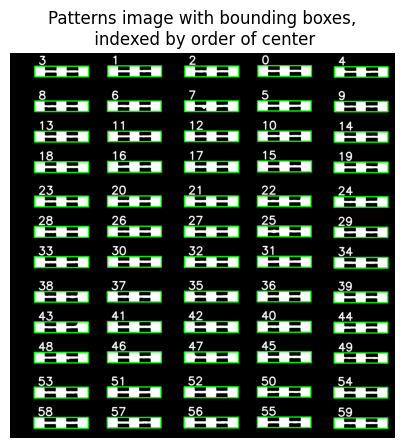

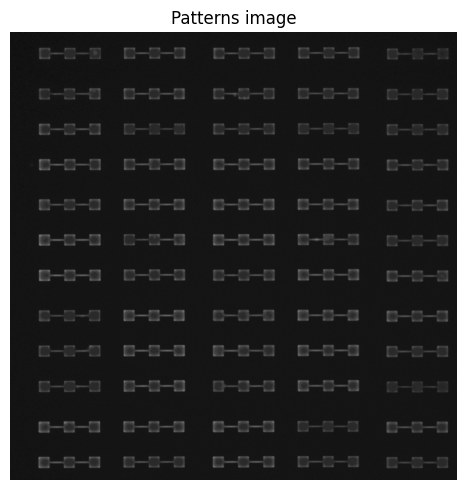

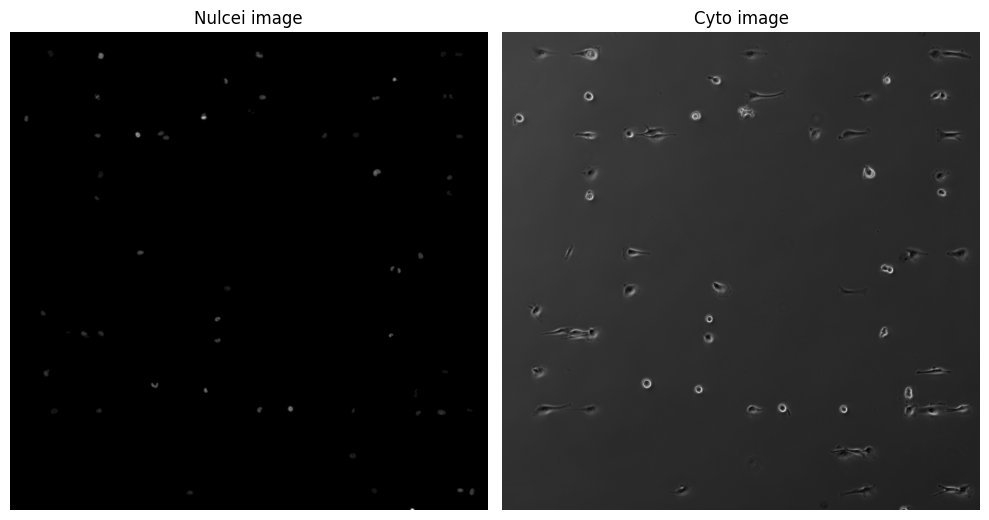

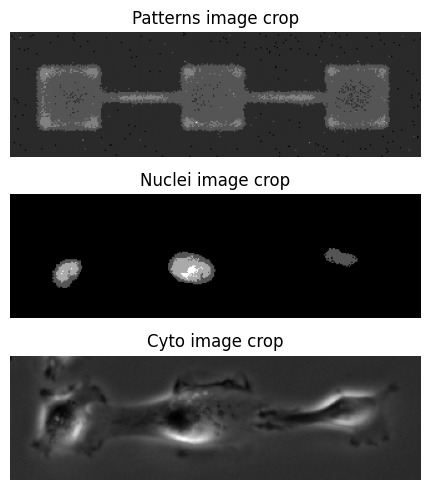

In [145]:
view = 0
frame = 0
patterns_image = img_as_ubyte(patterns_reader.get_frame_2D(c=0, v=view))
cyto_image = img_as_ubyte(cells_reader.get_frame_2D(c=0, t=frame, v=view))
nuclei_image = img_as_ubyte(cells_reader.get_frame_2D(c=1, t=frame, v=view))
print("Patterns image scale:")
print(f"\tmin: {patterns_image.min()}")
print(f"\tmax: {patterns_image.max()}")
print("Nuclei image scale:")
print(f"\tmin: {nuclei_image.min()}")
print(f"\tmax: {nuclei_image.max()}")
print("Cyto image scale:")
print(f"\tmin: {cyto_image.min()}")
print(f"\tmax: {cyto_image.max()}")
blur = cv2.GaussianBlur(patterns_image, (11, 11), 0)
_, thresh = cv2.threshold(blur, 1, 255, cv2.THRESH_BINARY)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
bound_boxes = [cv2.boundingRect(contour) for contour in contours]
rgb_image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
center_bound_boxes = []
for bound_box in bound_boxes:
    x, y, w, h = bound_box
    center_x = x + w // 2
    center_y = y + h // 2
    center_bound_boxes.append((center_y, center_x, bound_box))
    center_bound_boxes.sort(key=lambda x: (x[0], x[1]))

for i, (center_y, center_x, bound_box) in enumerate(center_bound_boxes):
    x, y, w, h = bound_box
    cv2.rectangle(rgb_image, (x, y), (x + w, y + h), (0, 255, 0), 5)
    cv2.putText(rgb_image, str(i), (x+20, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 5)
fig = plt.figure(figsize=(5, 5), dpi=100)
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.imshow(rgb_image)
ax_1.set_axis_off()
ax_1.set_title('Patterns image with bounding boxes,\n indexed by order of center')
plt.show()
fig = plt.figure(figsize=(5, 5), dpi=100)
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.imshow(patterns_image, cmap='gray')
ax_1.set_axis_off()
ax_1.set_title('Patterns image')
plt.tight_layout()
plt.show()
fig = plt.figure(figsize=(10, 10), dpi=100)
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.imshow(nuclei_image, cmap='gray')
ax_1.set_axis_off()
ax_1.set_title('Nulcei image')

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.imshow(cyto_image, cmap='gray')
ax_2.set_axis_off()
ax_2.set_title('Cyto image')
plt.tight_layout()
plt.show()

x_range = (1700, 2030)
y_range = (1570, 1670)
bound_box = (1700, 1570, 330, 100)
patterns_image_crop = patterns_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
nuclei_image_crop = nuclei_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
cyto_image_crop = cyto_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
fig = plt.figure(figsize=(5, 5), dpi=100)
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.imshow(patterns_image_crop, cmap='gray')
ax_1.set_axis_off()
ax_1.set_title('Patterns image crop')
ax_2 = fig.add_subplot(3, 1, 2)
ax_2.imshow(nuclei_image_crop, cmap='gray')
ax_2.set_axis_off()
ax_2.set_title('Nuclei image crop')
ax_3 = fig.add_subplot(3, 1, 3)
ax_3.imshow(cyto_image_crop, cmap='gray')
ax_3.set_axis_off()
ax_3.set_title('Cyto image crop')
plt.tight_layout()
plt.show()

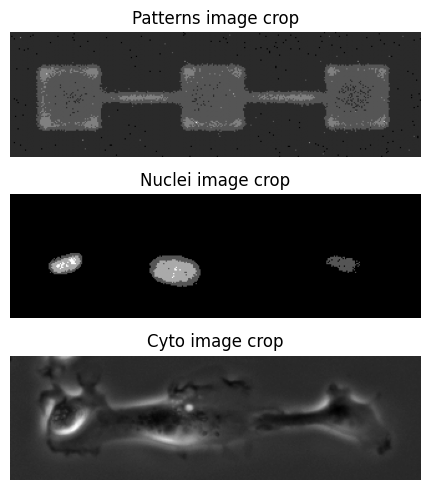

In [153]:
view = 0
frame = 1
patterns_image = img_as_ubyte(patterns_reader.get_frame_2D(c=0, v=view))
cyto_image = img_as_ubyte(cells_reader.get_frame_2D(c=0, t=frame, v=view))
nuclei_image = img_as_ubyte(cells_reader.get_frame_2D(c=1, t=frame, v=view))

x_range = (1700, 2030)
y_range = (1570, 1670)
bound_box = (1700, 1570, 330, 100)
patterns_image_crop = patterns_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
nuclei_image_crop = nuclei_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
cyto_image_crop = cyto_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
fig = plt.figure(figsize=(5, 5), dpi=100)
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.imshow(patterns_image_crop, cmap='gray')
ax_1.set_axis_off()
ax_1.set_title('Patterns image crop')
ax_2 = fig.add_subplot(3, 1, 2)
ax_2.imshow(nuclei_image_crop, cmap='gray')
ax_2.set_axis_off()
ax_2.set_title('Nuclei image crop')
ax_3 = fig.add_subplot(3, 1, 3)
ax_3.imshow(cyto_image_crop, cmap='gray')
ax_3.set_axis_off()
ax_3.set_title('Cyto image crop')
plt.tight_layout()
plt.show()

In [147]:
def normalize_image(image):
    percentiles = np.percentile(image, (1, 99))
    image = np.clip(image, percentiles[0], percentiles[1])
    image = (image - percentiles[0]) / (percentiles[1] - percentiles[0])
    image = image * 255
    return image.astype(np.uint8)

Number of nuclei found: 3


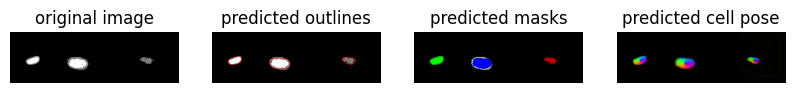

In [148]:
masks_pred, flows, styles, diams = model.eval(
            nuclei_image_crop,
            diameter=15,
            channels=[0, 0]
)
nuclei_num = len(np.unique(masks_pred)) - 1
print(f"Number of nuclei found: {nuclei_num}")
fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, nuclei_image_crop, masks_pred, flows[0])
plt.show()

In [149]:
view = 3
frame = 0
patterns_image = img_as_ubyte(patterns_reader.get_frame_2D(c=0, t=frame, v=view))
cyto_image = img_as_ubyte(cells_reader.get_frame_2D(c=0, t=frame, v=view))
nuclei_image = img_as_ubyte(cells_reader.get_frame_2D(c=1, t=frame, v=view))

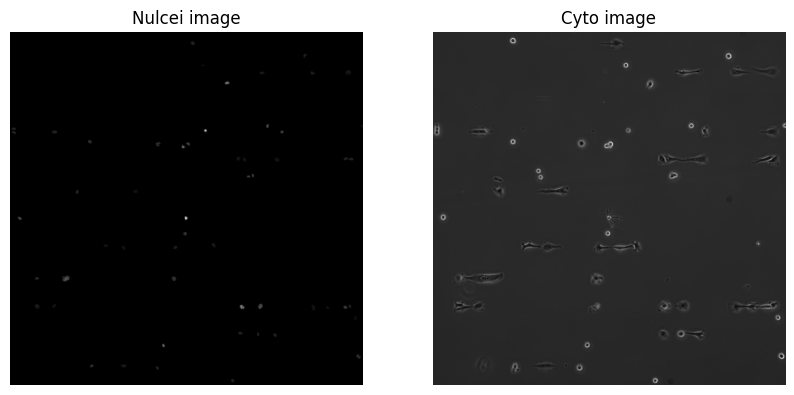

In [150]:
fig = plt.figure(figsize=(10, 20), dpi=100)
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.imshow(nuclei_image, cmap='gray')
ax_1.set_axis_off()
ax_1.set_title('Nulcei image')

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.imshow(cyto_image, cmap='gray')
ax_2.set_axis_off()
ax_2.set_title('Cyto image')
plt.show()

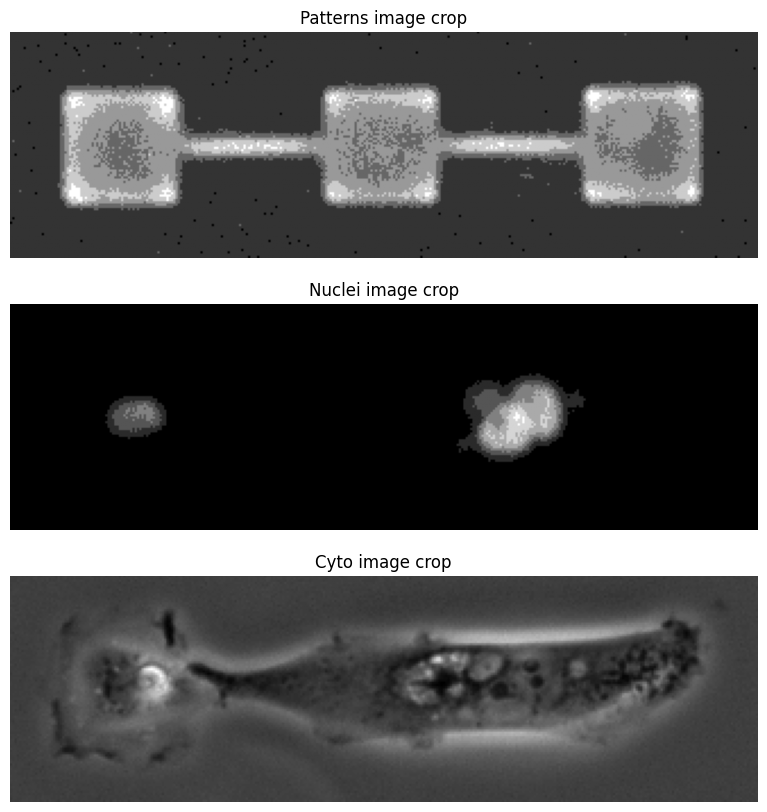

In [151]:
bound_box = (100, 1380, 330, 100)
patterns_image_crop = patterns_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
nuclei_image_crop = nuclei_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
cyto_image_crop = cyto_image[bound_box[1]:bound_box[1]+bound_box[3], bound_box[0]:bound_box[0]+bound_box[2]]
fig = plt.figure(figsize=(10, 10), dpi=100)
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.imshow(patterns_image_crop, cmap='gray')
ax_1.set_axis_off()
ax_1.set_title('Patterns image crop')
ax_2 = fig.add_subplot(3, 1, 2)
ax_2.imshow(nuclei_image_crop, cmap='gray')
ax_2.set_axis_off()
ax_2.set_title('Nuclei image crop')
ax_3 = fig.add_subplot(3, 1, 3)
ax_3.imshow(cyto_image_crop, cmap='gray')
ax_3.set_axis_off()
ax_3.set_title('Cyto image crop')
plt.show()

Number of nuclei found: 2


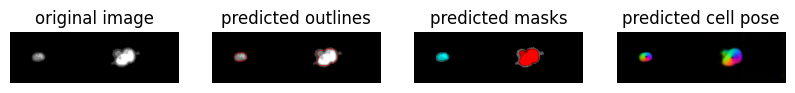

In [152]:
masks_pred, flows, styles, diams = model.eval(
            nuclei_image_crop,
            diameter=15,
            channels=[0, 0]
)
nuclei_num = len(np.unique(masks_pred)) - 1
print(f"Number of nuclei found: {nuclei_num}")
fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, nuclei_image_crop, masks_pred, flows[0])
plt.show()